In [49]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import math

In [50]:
gray_img = cv2.imread('monkey_image.png', cv2.IMREAD_GRAYSCALE)

In [51]:
gray_img

array([[160,  60,  53, ..., 124, 169, 196],
       [128, 111,  43, ..., 143, 164, 138],
       [ 84, 125,  51, ..., 110,  97,  89],
       ...,
       [155, 160, 155, ...,  90,  98,  86],
       [172, 155, 145, ...,  86,  87,  75],
       [ 11,  12,  14, ...,   6,   3,   4]], dtype=uint8)

In [52]:
pd_im=pd.DataFrame(gray_img)

In [53]:
pd_im

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,160,60,53,97,151,99,67,36,77,84,...,65,110,180,137,85,75,146,124,169,196
1,128,111,43,74,99,59,72,49,102,66,...,155,160,117,79,72,140,134,143,164,138
2,84,125,51,51,107,65,65,52,119,116,...,166,105,89,109,149,136,108,110,97,89
3,77,149,105,53,90,131,58,51,77,98,...,92,92,76,133,119,94,121,79,83,76
4,95,134,145,54,83,96,82,55,60,129,...,102,74,105,143,118,103,73,65,87,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,106,126,151,168,165,143,128,129,139,144,...,73,80,90,84,115,116,107,102,102,94
508,123,148,167,151,154,140,136,145,146,138,...,87,62,95,94,99,113,96,109,98,98
509,155,160,155,161,139,136,141,144,144,155,...,85,79,80,106,102,97,102,90,98,86
510,172,155,145,131,113,131,138,140,154,159,...,78,70,85,82,94,93,89,86,87,75


In [54]:
one_col = gray_img.reshape(1,512*512)
pd_col = pd.DataFrame(one_col)

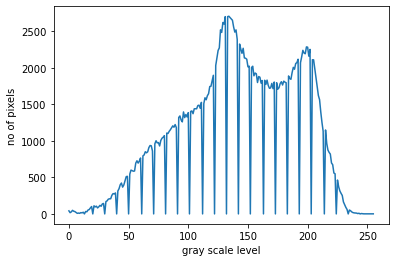

In [65]:
histg = cv2.calcHist([gray_img],[0],None,[256],[0,256])
plt.plot(histg)
plt.xlabel('gray scale level')
plt.ylabel('no of pixels')
plt.show()

In [ ]:
def pdf(x):#calculate pdf of the image
    

In [ ]:
def findK(b): #calculate k from b
    return math.log(b*(512*512),2)
def findDecisions(k): #find decisions levels
    return np.linspace(0.0, 255.0, num=(int)(k))
def findRepresentation(decision_arr): #find representations levels
    representation_arr=[]
    i=0
    while i<len(decision_arr)-1:
        representation_arr.append((decision_arr[i]+decision_arr[i+1])/2) #represnt_i is the avarge of dec_i and dec_i+1
        i=i+1
    return representation_arr

In [61]:

from scipy import integrate

def mseQuant_i(i,dec,rep,pdf): #calculate the MSE of interval i
    integrand = lambda x: ((x-rep[i-1])**2)*pdf(x) 
    result = integrate.quad(integrand, dec[i-1],dec[i], args=(a,b))
    
def mseQuantn(b): #calculate MSE of the quantization of the image
    k=findK(b)
    dec=findDecisions(k)
    rep=findRepresentation(dec)
    mse_tot=0
    for i in range(1,k+1):
       mse_tot=mse_tot+mseQuant_i(i,dec,rep,pdf) 

[  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150. 165. 180. 195.
 210. 225. 240. 255.]
[7.5, 22.5, 37.5, 52.5, 67.5, 82.5, 97.5, 112.5, 127.5, 142.5, 157.5, 172.5, 187.5, 202.5, 217.5, 232.5, 247.5]
